# Métodos Computacionales

## Unidad 3: 

### Cálculo Numérico

1. Álgebra Lineal




## Introducción.

El álgebra lineal es una disciplina donde se estudian los espacios vectoriales y el mapeo lineal entre ellos. En física y astronomía, varios fenómenos se pueden escribir fácilmente en términos de variables lineales, lo que hace que el álgebra lineal computacional sea un tema muy importante que se cubrirá a lo largo de este curso.

Un hecho interesante del álgebra lineal computacional es que no comprende enfoques numéricos ya que la mayoría de los métodos son exactos. El uso de una computadora es necesario debido a la gran cantidad de cálculos en lugar de la naturaleza no soluble de los problemas. Los errores numéricos provienen luego de aproximaciones de redondeo.

## Sistemas lineales de ecuaciones

Un sistema lineal es un conjunto de ecuaciones de variables $ n $ que se pueden escribir de forma general:

$$ a_ {11} x_1 + a_ {12} x_2 + \cdots a_ {1n} x_n = b_1 $$
$$ \vdots $$
$$ a_ {m1} x_1 + a_ {m2} x_2 + \cdots a_ {mn} x_n = b_m $$

donde $ n $ es, nuevamente, el número de variables y $ m $ el número de ecuaciones.

Un sistema lineal tiene solución si y solo si $ m \geq n $. Esto nos lleva al objetivo principal de un sistema lineal: encontrar el conjunto $ \{x_i \}_{i = 0}^n $ que cumple con todas las ecuaciones.

Aunque hay una forma intuitiva de resolver este tipo de sistemas, simplemente sumando y restando ecuaciones hasta alcanzar el resultado deseado, la gran cantidad de variables de algunos sistemas que se encuentran en física y astronomía hace necesario desarrollar enfoques iterativos y generales. A continuación, presentaremos la notación matricial y vectorial y algunas operaciones básicas que serán la base de los métodos que se desarrollarán en esta sección.

### Matrices y vectores

Una matriz $m\times n$ se puede definir como un conjunto de números dispuestos en columnas y filas como:

$$ A = [a_{ij}] = \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn} 
}\right] $$

Del mismo modo, es posible definir un vector de columna $ n $ -dimensional como

$$ \textbf{x} = \left[ \matrix{
x_{1} \\
x_{2} \\
\vdots\\
x_{n} 
}\right] $$

y un vector de fila

$$ \textbf{y} = \left[ \matrix{
y_{1} &
y_{2} &
\cdots &
y_{n} 
}\right] $$

### Matrices en Python

Una de las ventajas más útiles de los lenguajes de alto nivel como Python, es la manipulación de objetos complejos como matrices y vectores. Para esta parte, vamos a utilizar capacidades avanzadas para manejar matrices, proporcionadas por la biblioteca NumPy.

NumPy, además de los extremadamente útiles objetos de matriz NumPy, también proporciona los objetos Matrix que están sobrecargados con las operaciones de matriz adecuadas.

In [4]:
import numpy as np
import matplotlib.pyplot as pltyvn
import scipy.interpolate as interp

In [5]:
#NumPy Arrays
M1 = np.array( [[5,-4,0],[9,7,6],[0,2,5]] )
M2 = np.array( [[3,-2,1],[-1,5,4],[1,-2,3]] )
print (M1, "\n")
print (M2)

[[ 5 -4  0]
 [ 9  7  6]
 [ 0  2  5]] 

[[ 3 -2  1]
 [-1  5  4]
 [ 1 -2  3]]


In [6]:
M1[0][0]

5

In [7]:
#Addition
print (M1+M2)

[[ 8 -6  1]
 [ 8 12 10]
 [ 1  0  8]]


In [8]:
#Multiplication
print (M1*M2)

[[15  8  0]
 [-9 35 24]
 [ 0 -4 15]]


In [9]:
#Division
print (1.0*M1/M2)

[[ 1.66666667  2.          0.        ]
 [-9.          1.4         1.5       ]
 [ 0.         -1.          1.66666667]]


In [10]:
M1.shape
#len(M1)

(3, 3)

## Eliminación gaussiana

Un primer método para resolver sistemas lineales de ecuaciones es la eliminación gaussiana. Este procedimiento consiste en un conjunto de pasos recursivos realizados para diagonalizar la matriz del problema.

### Step

Now, we shall describe the general procedure for Gaussian elimination: 

**1.** Give an augmented matrix $\hat{A}=[A:\textbf{b}]$.

**2.** Find the first non-zero coefficient $a_{i1}$ associated to $x_1$. This element is called **pivot**.

**3.** Apply the operation $Swap(E_1,E_i)$. This guarantee the first row has a non-zero coefficient $a_{11}$.

**4.** Apply the operation $Comb(E_j,E_1,-a_{j1}/a_{11})$. This eliminates the coefficients associated to $x_1$ in all the rows but in the first one.

**5.** Repeat steps **2** to **4** but for the coefficients of $x_2$ and then $x_3$ and so up to $x_n$. When iterating the coefficients of $x_{k}$, do not take into account the first $k$-th rows as they are already sorted.

**6.** Once you obtain a diagonal form of the matrix, apply the operation $Lamb(E_n,1/a_{nn})$. This will make the coefficient of $x_n$ in the last equation equal to 1.

**7.** The final result should be an augmented matrix of the form:

$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1(n-1)} & a_{1n} & \vdots & \hat b_1 \\
0 & a_{22} & \cdots & a_{2(n-1)} & a_{2n} & \vdots & \hat b_2 \\
\vdots & \vdots &  & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & a_{(n-1)(n-1)} & a_{(n-1)n} & \vdots & \hat b_{n-1} \\
0 & 0 & \cdots & 0 & 1 & \vdots & \hat b_n
}\right]$$

**8.** The solution to the problem is then obtained through backward substitutions, i.e.

$$x_n = \hat b_n$$
$$ x_{n-1} =  \frac{\hat b_{n-1} + a_{(n-1)n}x_n}{a_{(n-1)(n-1)}}$$
$$\vdots$$
$$x_i = \frac{\hat b_i - \sum_{j=i+1}^n a_{ij}x_j}{a_{ii}}\ \ \ \ \mbox{for}\ \ \ i=n-1, n-2, \cdots, 1$$

In [11]:
#Gaussian Elimination
def Gaussian_Elimination( A0 ):
    #Making local copy of matrix
    A = np.copy(A0)
    #Detecting size of matrix
    n = len(A)
    
    #Sweeping all the columns in order to eliminate coefficients of the i-th variable
    for i in xrange( 0, n ):
        
        #Sweeping all the rows for the i-th column in order to find the first non-zero coefficient
        for j in xrange( i, n ):
            if A[i,j] != 0:
                #Normalization coefficient
                Norm = 1.0*A[i,j]
                break
                
        #Applying swap operation to put the non-zero coefficient in the i-th row
        A = row_swap( i, j, A )
        
        #Eliminating the coefficient associated to the i-th variable
        for j in xrange( i+1, n ):
            A = row_comb( j, i, -A[j,i]/Norm, A ) i=0, j=3
            
    #Normalizing n-th variable
    A = row_lamb( n-1, 1.0/A[n-1,n-1], A )
    
    #Finding solution
    x = np.zeros( n )
    x[n-1] = A[n-1,n]
    for i in xrange( n-1, -1, -1 ):
        x[i] = ( A[i,n] - sum(A[i,i+1:n]*x[i+1:n]) )/A[i,i]
    
    #Upper diagonal matrix and solutions x
    return A, x

SyntaxError: invalid syntax (<ipython-input-11-546e3719289a>, line 23)

In [16]:
A = np.array( [[5,-4,0],[9,7,6],[0,2,5]] )

print(A, A[1,2])

[[ 5 -4  0]
 [ 9  7  6]
 [ 0  2  5]] 6


## Determinante matricial

El determinante de una matriz es una cantidad escalar calculada para la matriz cuadrada. Esto proporciona información importante sobre la matriz de coeficientes de un sistema de ecuaciones lineales. Por ejemplo, cualquier sistema de ecuaciones $ n $ y $ n $ incógnitas tiene una solución única si el determinante asociado es distinto de cero. Esto también implica que el determinante permite evaluar si una matriz es singular o no singular.

A continuación, definiremos algunas propiedades de los determinantes que nos permitirán calcular los determinantes utilizando un código recursivo:

**1.** If $A = [a]$ is a $1\times 1$ matrix, its determinant is then $\det A = a$.

**2.** If $A$ is a $n\times n$ matrix, the minor matrix $M_{ij}$ is the determinant of the $(n-1)\times(n-1)$ matrix obtained by deleting the $i$th row and the $j$th column.

**3.** The cofactor $A_{ij}$ associated with $M_{ij}$ is defined by $A_{ij} = (-1)^{i+j}M_{ij}$.

**4.** The determinant of a $n\times n$ matrix $A$ is given by:

$$ \det A = \sum_{j=1}^n a_{ij}A_{ij} $$

or 

$$ \det A = \sum_{i=1}^n a_{ij}A_{ij} $$

This is, it is possible to use both, a row or a column for calculating the determinant.

In [160]:
def dete(A):
    det=0
    if len(A)==1:
        det=A[0]
    elif len(A)==2:
        det=A[0][0]*A[1][1]-A[1][0]*A[0][1]
    else:
        B=np.delete(A,0,axis=1)
        for j in range(len(A)):
            C=np.delete(B,j,axis=0)
            cof=A[j][0]
            print(cof,C)
            det+=cof*(-1)**(0+j)*dete(C)
            
            
    return(det)

In [161]:
M

array([[  3,   1,   3,  -4],
       [  6,   4,   8, -10],
       [  3,   2,   5,  -1],
       [ -9,   5,  -2,  -4]])

In [162]:
dete(M)

3 [[  4   8 -10]
 [  2   5  -1]
 [  5  -2  -4]]
4 [[ 5 -1]
 [-2 -4]]
2 [[  8 -10]
 [ -2  -4]]
5 [[  8 -10]
 [  5  -1]]
6 [[ 1  3 -4]
 [ 2  5 -1]
 [ 5 -2 -4]]
1 [[ 5 -1]
 [-2 -4]]
2 [[ 3 -4]
 [-2 -4]]
5 [[ 3 -4]
 [ 5 -1]]
3 [[  1   3  -4]
 [  4   8 -10]
 [  5  -2  -4]]
1 [[  8 -10]
 [ -2  -4]]
4 [[ 3 -4]
 [-2 -4]]
5 [[  3  -4]
 [  8 -10]]
-9 [[  1   3  -4]
 [  4   8 -10]
 [  2   5  -1]]
1 [[  8 -10]
 [  5  -1]]
4 [[ 3 -4]
 [ 5 -1]]
2 [[  3  -4]
 [  8 -10]]


-24

In [149]:
C=np.delete(B,0,axis=0)
D=np.delete(C,0,axis=1)
D

array([[ 2,  5, -1],
       [ 5, -2, -4]])

## Inversión matricial

Asumiendo una matriz no singular $ A $, si existe una matriz $ A ^ {- 1} $, con $ AA ^ {- 1} = I $ y $ A ^ {- 1} A = I $, donde $ I $ es la matriz de identidad, entonces $ A ^ {- 1} $ se llama matriz inversa de $ A $. Si tal matriz no existe, se dice que $ A $ es una matriz singular.

Un corolario de esta definición es que $ A $ es también la matriz inversa de $ A ^ {- 1} $.

Una vez definido el método de eliminación gaussiana, es posible extenderlo para encontrar el inverso de cualquier matriz no singular.
Consideremos la siguiente ecuación:

## LU factorización

Aunque la factorización LU parece ser un método mucho mejor para resolver sistemas lineales en comparación con la eliminación Gaussiana, supusimos que ya conocíamos las matrices $ \mathbf {L} $ y $ \mathbf {U} $. Ahora vamos a ver el algoritmo para realizar esta reducción que requiere un tiempo de cálculo de $ \mathcal {O} (n ^ 3/3) $.

Te preguntarás entonces, ¿qué ventaja implica el uso de esta factorización? Bueno, las matrices $ \mathbf {L} $ y $ \mathbf {U} $ no dependen del sistema específico a resolver, es decir, no hay dependencia del vector $ \ mathbf {b} $, así que una vez que tengamos ambos matrices, podemos usarlas para resolver cualquier sistema que queramos, simplemente tomando un tiempo de computación $ \mathcal {O} (2n ^ 2) $.

Primero, supongamos que una matriz $ \ mathbf {A} $ con todos sus pivotes son distintos de cero, por lo que no es necesario intercambiar filas. Ahora, cuando queremos eliminar todos los coeficientes asociados a $ x_1 $, realizamos las siguientes operaciones:

$$ (E_j-m_ {j1} E_1) \rightarrow (E_j), \ \ \ \ \mbox {donde} \ \ \ \ m_ {j1} = \frac {a ^ {(1)} _ {j1}} {a ^ {(1)} _ {11}} $$

en adelante, $ a ^ {(1)} _ {ij} $ denota los componentes de la matriz original $ \mathbf {A} = \mathbf {A} ^ {(1)} $, $ a ^ {(2)} _ {ij} $ los componentes de la matriz después de eliminar los coeficientes de $ x_1 $, y en general, $ a ^ {(k)} _ {ij} $ los componentes de la matriz después de eliminar los coeficientes de $ x_ {k- 1} $.

La operación anterior sobre la matriz $ \mathbf {A} $ también se puede reproducir definiendo la matriz $ \mathbf {M} ^ {(1)} $

$$\mathbf{M}^{(1)} = \left[ \matrix{
1 & 0 & \cdots & 0 & 0 \\
-m_{21} & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
-m_{(n-1)1} & 0 & \cdots & 1 & 0 \\
-m_{n1} & 0 & \cdots & 0 & 1
}\right]$$

Esto se llama la **primera matriz de transformación gaussiana**. De esto, tenemos


$$ \mathbf {A} ^ {(2)} \mathbf {x} = \mathbf {M} ^ {(1)} \mathbf {A} ^ {(1)} \mathbf {x} = \mathbf { M} ^ {(1)} \mathbf {b} ^ {(1)} = \mathbf {b} ^ {(2)} $$

donde $ \mathbf {A} ^ {(2)} $ es una matriz con coeficientes nulos asociados a $ x_1 $ pero el primero.

Repitiendo el mismo procedimiento para los próximos pivotes, obtenemos entonces

$$ \mathbf {A} ^ {(n)} = \mathbf {M} ^ {(n-1)} \mathbf {M} ^ {(n-2)} \cdots \mathbf {M} ^ {( 1)} \mathbf {A} ^ {(1)} $$

donde la **matriz de transformación gaussiana de $ k $ th** se define como

$$ \mathbf {M} ^ {(k)} _ {ij} = \left \{\matrix {
1 & \mbox {if} \ \ i = j \\
-m_ {ij} & \mbox {if} \ \ j = k \ \ \mbox {y} \ \ k + 1 \leq i \leq n \\
0 & \mbox {de lo contrario}
} \right. $$

$$m_{ij} = \frac{a^{(j)}_{ij}}{a^{(j)}_{jj}} $$

Note $\mathbf{A}^{(n)}$ is a upper diagonal matrix given by

$$\mathbf{A}^{(n)} = \left[ \matrix{
a_{11}^{(n)} & a_{12}^{(n)} & \cdots & a_{1(n-1)}^{(n)} & a_{1n}^{(n)}\\
0 & a_{22}^{(n)} & \cdots & a_{2(n-1)}^{(n)} & a_{2n}^{(n)} \\
\vdots & \vdots &  & \vdots & \vdots &\\
0 & 0 & \cdots & a_{(n-1)(n-1)}^{(n)} & a_{(n-1)n}^{(n)} \\
0 & 0 & \cdots & 0 & a_{nn}^{(n)}
}\right]$$

$$\mathbf{A}^{(n)} = \left[ \matrix{
a_{11}^{(n)} & a_{12}^{(n)} & \cdots & a_{1(n-1)}^{(n)} & a_{1n}^{(n)}\\
0 & a_{22}^{(n)} & \cdots & a_{2(n-1)}^{(n)} & a_{2n}^{(n)} \\
\vdots & \vdots &  & \vdots & \vdots &\\
0 & 0 & \cdots & a_{(n-1)(n-1)}^{(n)} & a_{(n-1)n}^{(n)} \\
0 & 0 & \cdots & 0 & a_{nn}^{(n)}
}\right]$$

Entonces nosotros podemos definir $\mathbf{U}\equiv \mathbf{A}^{(n)}$.

Ahora, tomando la ecuacion 

$$ \mathbf{A}^{(n)} = \mathbf{M}^{(n-1)}\mathbf{M}^{(n-2)}\cdots \mathbf{M}^{(1)}\mathbf{A}^{(1)} $$

y definimos la inversa de $\mathbf{M}^{(k)}$ as 

$$ \mathbf{L}^{(k)}_{ij} = \left(\mathbf{M}^{(k)}\right)^{-1}_{ij} =  \left\{ \matrix{
1 & \mbox{if}\ \ i=j \\
m_{ij} & \mbox{if}\ \ j=k\ \ \mbox{and}\ \ k+1\leq i \leq n \\
0 & \mbox{otherwise}
}  \right.$$

Nosotros obtenemos

$$ \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)}\mathbf{A}^{(n)} = \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)}\mathbf{M}^{(n-1)}\mathbf{M}^{(n-2)}\cdots \mathbf{M}^{(1)}\mathbf{A}^{(1)} = \mathbf{L}\mathbf{U} $$

where the lower diagonal matrix $\mathbf{L}$ is given by:

$$ \mathbf{L} = \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)} $$.

In [15]:
import numpy as np
from scipy.linalg import lu_factor as lu
M=np.array([[3,1,3,-4],[6,4,8,-10],[3,2,5,-1],[-9,5,-2,-4]])
lu,piv=lu(M)
piv

array([3, 1, 2, 3], dtype=int32)

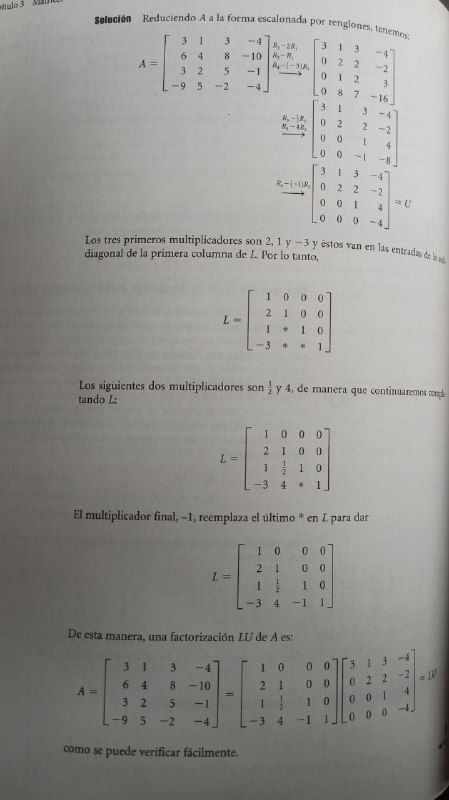

### Algoritmo

El algoritmo viene dado por:

**1.** Dé una matriz cuadrada $ \mathbf {A} $ donde los pivotes son distintos de cero.

**2.** Aplica la operación $ Comb(E_j, E_1, -a ^ {(1)} _ {j1}/ aa ^ {(1)} _ {11}) $. Esto elimina los coeficientes asociados a $ x_1 $ en todas las filas, pero en la primera.

**3.** Construya la matriz $ \mathbf {L} ^ {(1)} $ dada por

$$ \mathbf {L} ^ {(k)} _ {ij} = \left \{\matrix{
1 & \mbox {if}\ \ i = j \\
m_{ij} = \frac {a ^{(j)}_{ij}} {a^{(j)}_{jj}} & \mbox {if}\ \ j = k\ \ \mbox {y }\ \ k + 1\leq i \leq n \\
0 & \mbox{de lo contrario}
} \right. $$

con $ k = 1 $.

**4.** Repita los pasos ** 2 ** y ** 3 ** para la siguiente columna hasta llegar a la última.

**5.** Devuelve las matrices $ \mathbf {U} = \mathbf {A} ^ {(n)} $ y $ \mathbf {L} = \mathbf {L} ^ {(1)} \cdots \mathbf {L} ^ {(n-2)} \mathbf {L} ^ {(n-1)} $.